In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('/content/loan_detection.csv')
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [48]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [49]:
df.isnull()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isnull().sum()

,0
age,0
campaign,0
pdays,0
previous,0
no_previous_contact,0
not_working,0
job_admin.,0
job_blue-collar,0
job_entrepreneur,0
job_housemaid,0


In [51]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
print(df['Loan_Status_label'].value_counts())
print(len(df[df['Loan_Status_label'] == 0])/len(df)*100)
print(len(df[df['Loan_Status_label'] == 1])/len(df)*100)

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64
88.73458288821988
11.265417111780131


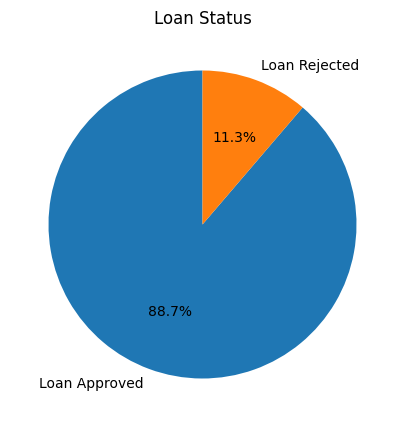

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(df['Loan_Status_label'].value_counts(), labels=['Loan Approved', 'Loan Rejected'],
        autopct='%1.1f%%', startangle=90)
plt.title('Loan Status')
plt.show()

In [56]:
correlation_matrix = df.corr()
print(correlation_matrix['Loan_Status_label'])

age                              0.030399
campaign                        -0.066357
pdays                           -0.324914
previous                         0.230181
no_previous_contact             -0.324877
not_working                      0.121246
job_admin.                       0.031426
job_blue-collar                 -0.074423
job_entrepreneur                -0.016644
job_housemaid                   -0.006505
job_management                  -0.000419
job_retired                      0.092221
job_self-employed               -0.004663
job_services                    -0.032301
job_student                      0.093955
job_technician                  -0.006149
job_unemployed                   0.014752
job_unknown                     -0.000151
marital_divorced                -0.010608
marital_married                 -0.043398
marital_single                   0.054133
marital_unknown                  0.005211
education_basic.4y              -0.010798
education_basic.6y              -0

In [57]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter correlations with 'Loan_Status_label' greater than 0.2 or less than -0.2
correlation_with_target = correlation_matrix['Loan_Status_label']
filtered_correlation = correlation_with_target[(correlation_with_target > 0.2) | (correlation_with_target < -0.2)]

# Display the filtered correlations
print(filtered_correlation)


pdays                 -0.324914
previous               0.230181
no_previous_contact   -0.324877
poutcome_success       0.316269
Loan_Status_label      1.000000
Name: Loan_Status_label, dtype: float64


In [ ]:
# pdays, previous, no_previous_contact, poutcome_success

In [58]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [59]:
df['pdays'] = df['pdays'].replace(999, 0)

In [60]:
df['pdays'].unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

In [61]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [62]:
df['no_previous_contact'].unique()

array([1, 0])

In [63]:
df['poutcome_success'].unique()

array([0, 1])

In [64]:
columns_to_keep = ['pdays', 'previous', 'no_previous_contact', 'poutcome_success', 'Loan_Status_label']

# Dropping all columns except specified ones
df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

In [65]:
df.head()

,pdays,previous,no_previous_contact,poutcome_success,Loan_Status_label
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [66]:
# prompt: Use smote to balance the imbalance in Loan_Status_label column

from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('Loan_Status_label', axis=1)
y = df['Loan_Status_label']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Loan_Status_label'] = y_resampled

# Print the value counts of the target variable in the resampled data
print(df_resampled['Loan_Status_label'].value_counts())

Loan_Status_label
0    36548
1    36548
Name: count, dtype: int64


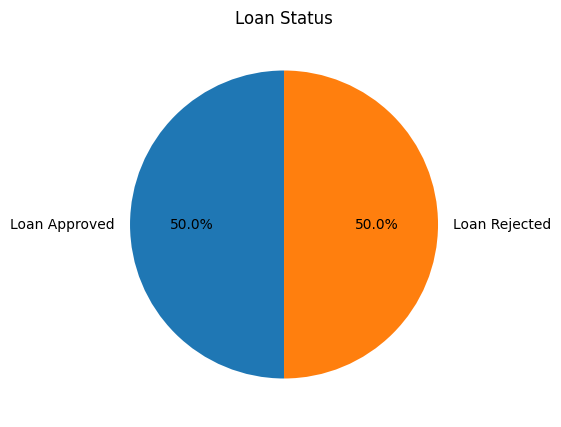

In [68]:
plt.figure(figsize=(5,5))
plt.pie(df_resampled['Loan_Status_label'].value_counts(), labels=['Loan Approved', 'Loan Rejected'],
        autopct='%1.1f%%', startangle=90)
plt.title('Loan Status')
plt.show()

In [70]:
df['pdays'].unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

In [71]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [72]:
df['no_previous_contact'].unique()

array([1, 0])

In [73]:
df['poutcome_success'].unique()

array([0, 1])

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [90]:
x = df_resampled.drop('Loan_Status_label', axis=1)
y = df_resampled['Loan_Status_label']

In [91]:
x

,pdays,previous,no_previous_contact,poutcome_success
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
73091,8,2,0,0
73092,0,0,1,0
73093,0,0,1,0
73094,0,1,1,0


In [92]:
y

,Loan_Status_label
0,0
1,0
2,0
3,0
4,0
...,...
73091,1
73092,1
73093,1
73094,1


In [93]:
df.shape

(41188, 5)

In [94]:
# prompt: perform logistic regression and check precisiom

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate and print the classification report
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.6075923392612859
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      7332
           1       0.74      0.33      0.46      7288

    accuracy                           0.61     14620
   macro avg       0.65      0.61      0.57     14620
weighted avg       0.65      0.61      0.58     14620

Confusion Matrix:


array([[6468,  864],
       [4873, 2415]])

In [95]:
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

In [96]:
y_train[:5]

,Loan_Status_label
14543,0
56260,1
70110,1
1346,0
2979,0


In [97]:
y_pred_train[:5]

array([0, 0, 1, 0, 0])

In [98]:
y_test[:5]

,Loan_Status_label
46673,1
10186,0
71199,1
48227,1
47094,1


In [99]:
y_pred_test[:5]

array([0, 0, 0, 0, 1])

In [101]:
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.6075923392612859

In [102]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_accuracy

0.6067446473767015